## Exercicio

### A Probablistic Classification System for Predicting the Cellular Localization Sites of Proteins

1. Desenvolver modelo e report de métricas.

-------------

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
! git clone https://github.com/renadeveloper/course_betech_machine_learning_I_activities

Cloning into 'course_betech_machine_learning_I_activities'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 13.90 KiB | 245.00 KiB/s, done.
Resolving deltas: 100% (1/1), done.


In [6]:
yeast = pd.read_csv("./course_betech_machine_learning_I_activities/yeast.csv")

In [7]:
yeast.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [8]:
yeast.dtypes

mcg     float64
gvh     float64
alm     float64
mit     float64
erl     float64
pox     float64
vac     float64
nuc     float64
name     object
dtype: object

In [9]:
yeast.isnull().sum()

mcg     0
gvh     0
alm     0
mit     0
erl     0
pox     0
vac     0
nuc     0
name    0
dtype: int64

In [10]:
yeast.shape

(1484, 9)

In [11]:
yeast.name.value_counts()

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: name, dtype: int64

In [12]:
yeast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     1484 non-null   float64
 1   gvh     1484 non-null   float64
 2   alm     1484 non-null   float64
 3   mit     1484 non-null   float64
 4   erl     1484 non-null   float64
 5   pox     1484 non-null   float64
 6   vac     1484 non-null   float64
 7   nuc     1484 non-null   float64
 8   name    1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


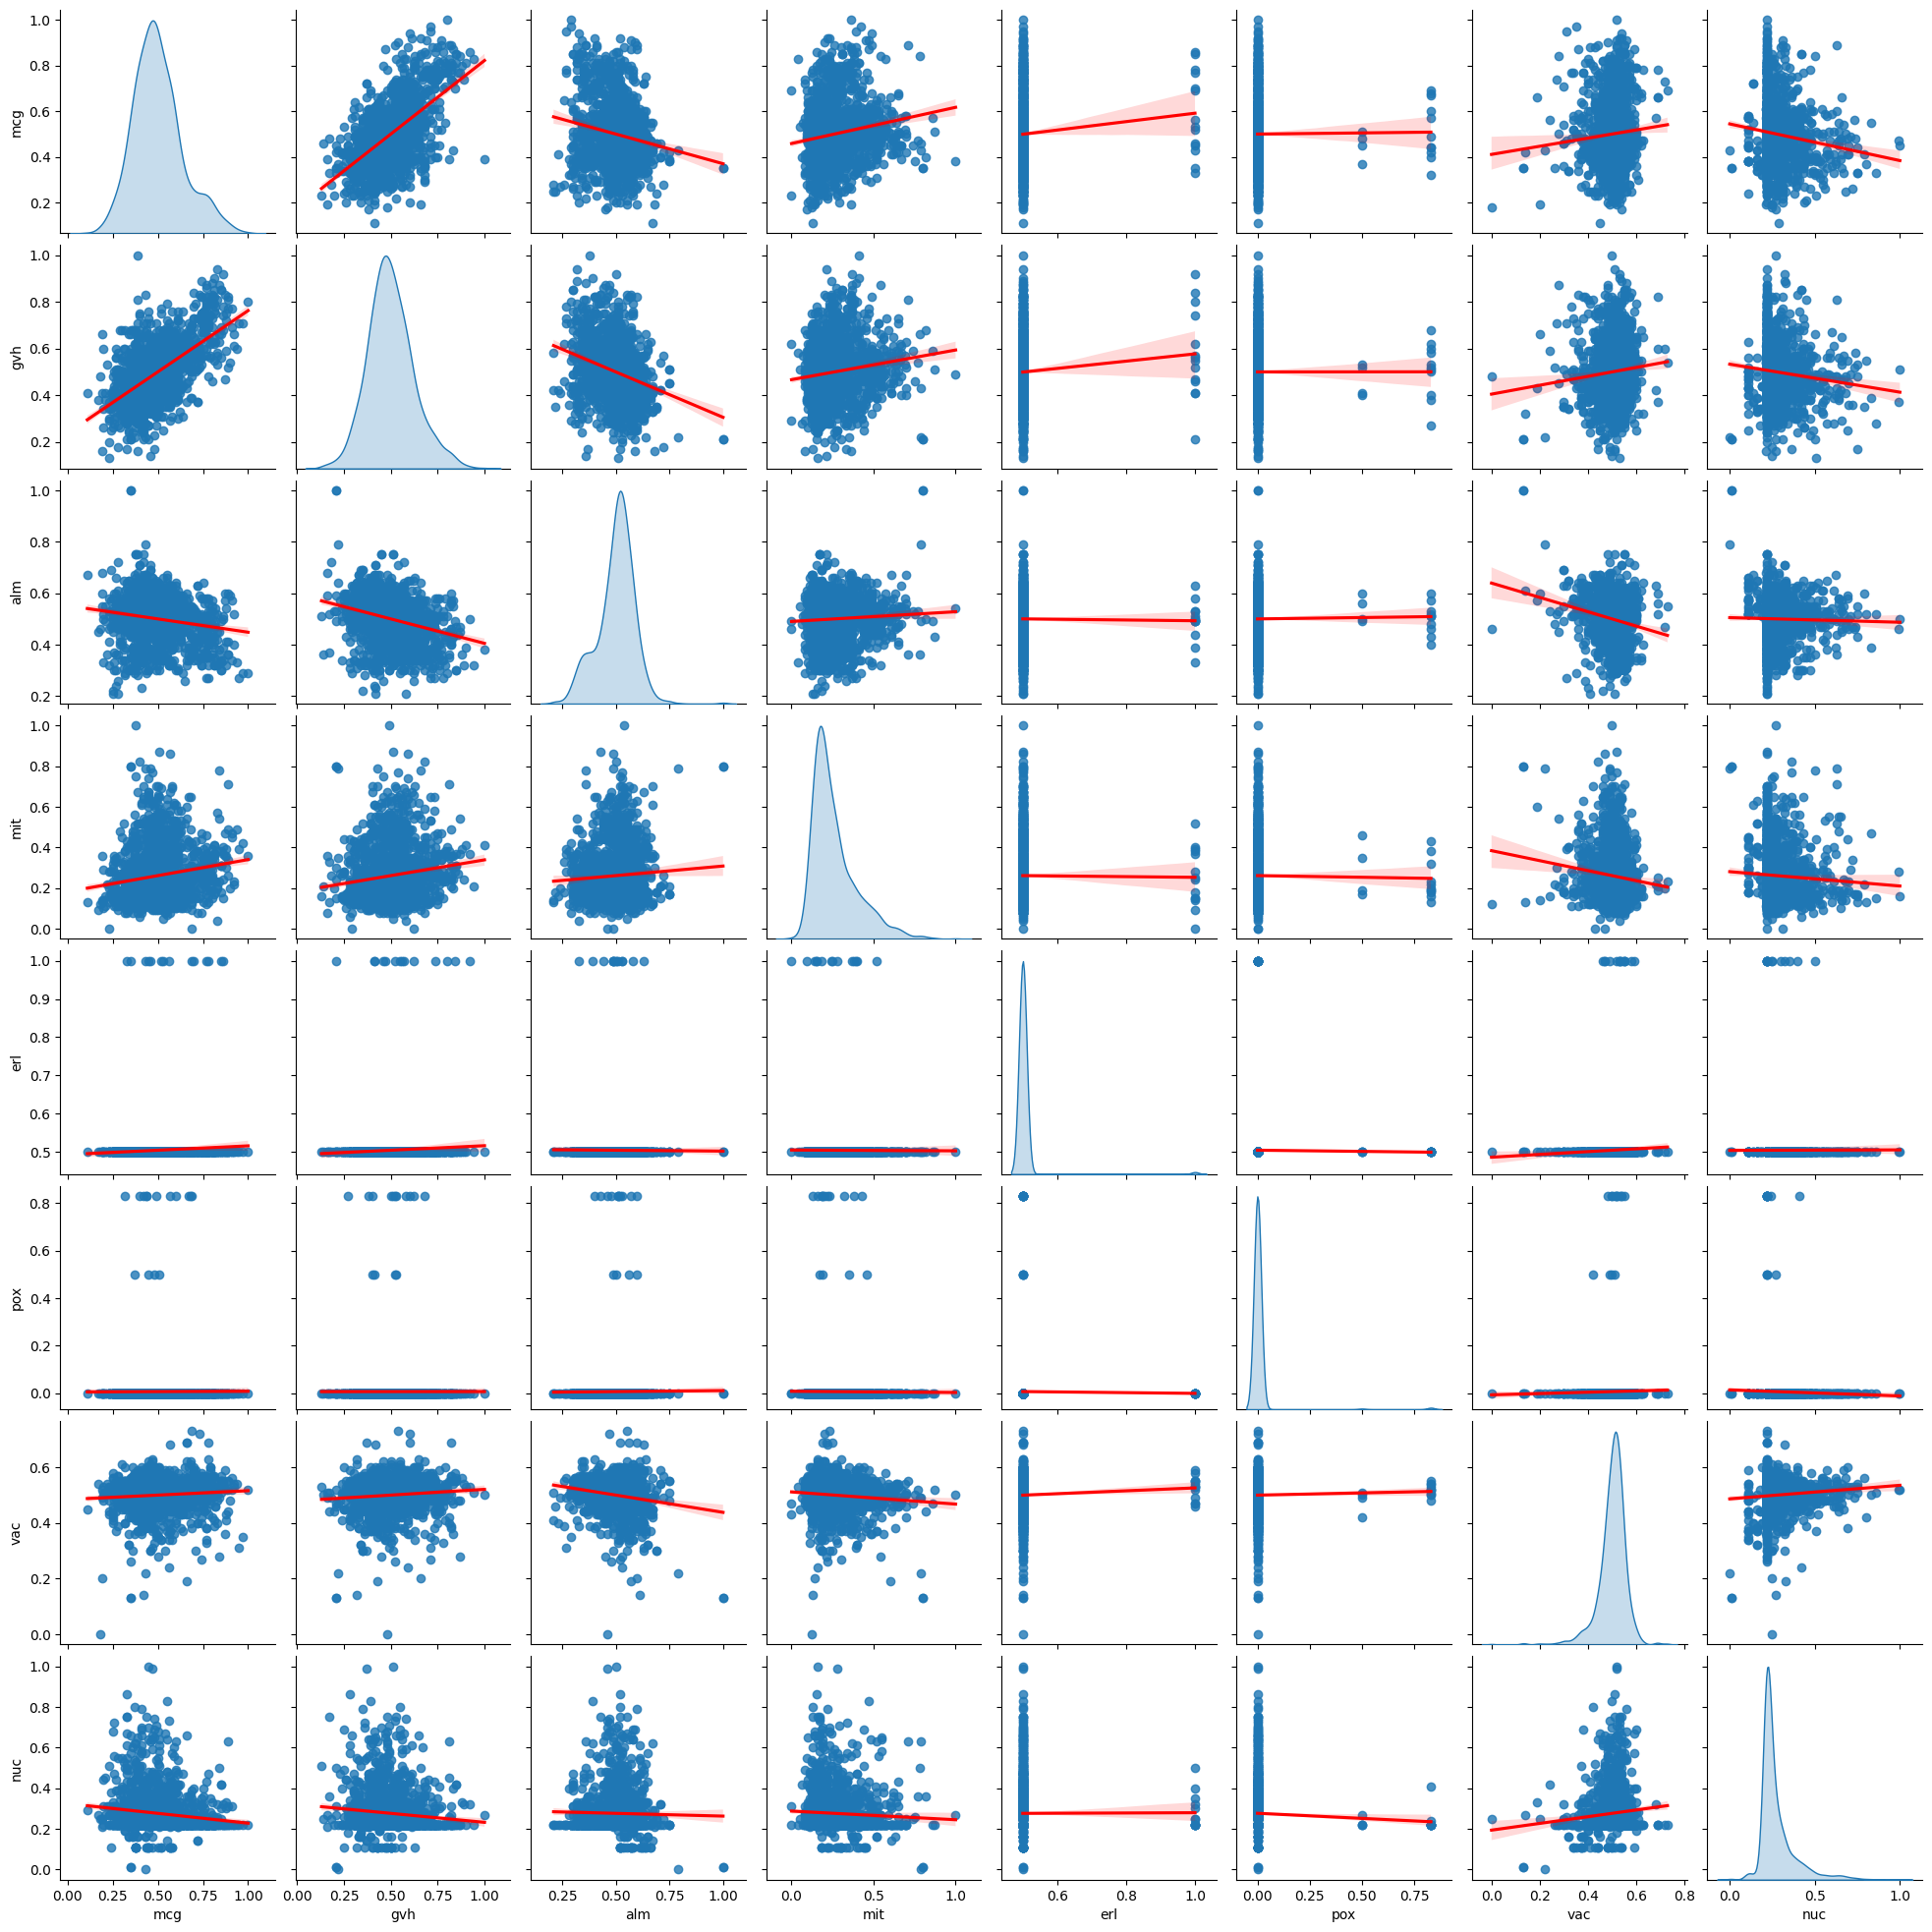

In [15]:
sns.pairplot(yeast, kind="reg", diag_kind="kde", plot_kws={'line_kws':{'color':'red'}})

In [16]:
le=LabelEncoder()
yeast["name"]=le.fit_transform(yeast["name"].values)

In [17]:
yeast.head(10)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,name
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,6
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,6
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,6
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,7
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,6
5,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,0
6,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,6
7,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,7
8,0.55,0.50,0.66,0.36,0.5,0.0,0.49,0.22,6
9,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,0


In [18]:
X = yeast.drop(columns=["name"])
y = yeast.name

In [21]:
reg_log = LogisticRegression()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
reg_log.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred = reg_log.predict(X_test)

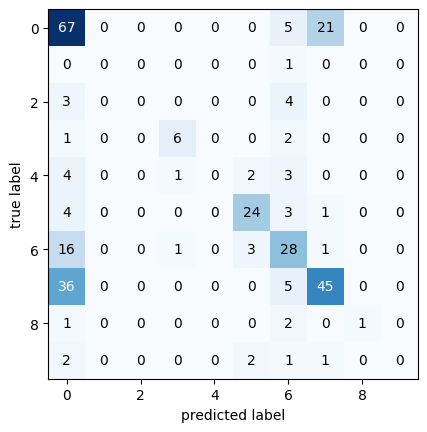

In [30]:
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

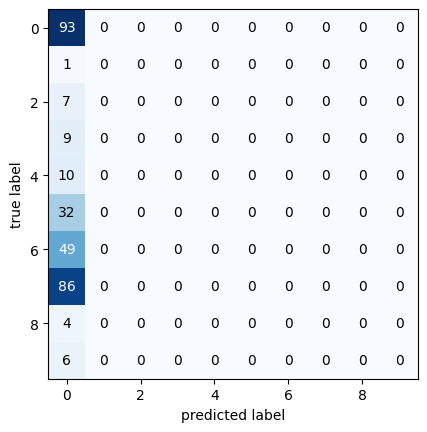

In [31]:
# Ajustando o threshold da RegLog
y_pred_proba = reg_log.predict_proba(X_test)
threshold = 0.1
predicted_labels = (y_pred_proba[:,1] > threshold).astype(int)
cm = confusion_matrix(y_test, predicted_labels)
plot_confusion_matrix(conf_mat=cm)
plt.show()

In [35]:

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.72      0.50      0.59       134
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.67      0.75      0.71         8
           4       0.00      0.00      0.00         0
           5       0.75      0.77      0.76        31
           6       0.57      0.52      0.54        54
           7       0.52      0.65      0.58        69
           8       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         0

    accuracy                           0.58       297
   macro avg       0.35      0.42      0.36       297
weighted avg       0.65      0.58      0.60       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


------------------------------

In [36]:
print("Train Score:",reg_log.score(X_train,y_train))
print("Test Score:",reg_log.score(X_test,y_test))

Train Score: 0.556866048862679
Test Score: 0.5757575757575758


In [37]:
yeast.name.value_counts()

0    463
7    429
6    244
5    163
4     51
3     44
2     35
9     30
8     20
1      5
Name: name, dtype: int64

Os valores de score para treino e teste foram semelhantes, sendo assim acredito que não houve overfitting apesar de que, o modelo não generaliza bem e não possui score para os valores de diagnóstico 1,2,4 e 9.